In [ ]:
import pandas as pd
# from pandasgui import show
import os

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

flow_pt_to_es: pd.DataFrame = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz").interpolate()
flow_es_to_pt: pd.DataFrame = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz").interpolate()
flow_fr_to_es: pd.DataFrame = pd.read_pickle("../.data_cache/flow_fr_to_es.pkl.gz").interpolate()
flow_es_to_fr: pd.DataFrame = pd.read_pickle("../.data_cache/flow_es_to_fr.pkl.gz").interpolate()
generation_pt: pd.DataFrame = pd.read_pickle("../.data_cache/generation_pt.pkl.gz").interpolate()
generation_es: pd.DataFrame = pd.read_pickle("../.data_cache/generation_es.pkl.gz").interpolate()
generation_fr: pd.DataFrame = pd.read_pickle("../.data_cache/generation_fr.pkl.gz").interpolate()

# Set index for flow dataframes
flow_pt_to_es.set_index("start_time", inplace=True)
flow_es_to_pt.set_index("start_time", inplace=True)
flow_fr_to_es.set_index("start_time", inplace=True)
flow_es_to_fr.set_index("start_time", inplace=True)
generation_pt.set_index("start_time", inplace=True)
generation_es.set_index("start_time", inplace=True)
generation_fr.set_index("start_time", inplace=True)

In [5]:
from data_fetcher import ENTSOEDataFetcher
import nest_asyncio
from data_fetcher import SimpleInterval
from datetime import datetime

nest_asyncio.apply()

# Apply nest_asyncio to allow nested event loops (useful for Jupyter notebooks)
fetcher = ENTSOEDataFetcher()

data_request = SimpleInterval(datetime(2024, 1,1,0), datetime(2024, 1,1,1))
data = fetcher.get_data(data_request)

[async_get_physical_flows] Start: 19:59:27, End: 19:59:27, took 0.04s: from: 10YES-REE------0 to 10YPT-REN------W
[async_get_physical_flows] Start: 19:59:27, End: 19:59:27, took 0.04s: from: 10YES-REE------0 to 10YFR-RTE------C
[async_get_physical_flows] Start: 19:59:27, End: 19:59:27, took 0.05s: from: 10YPT-REN------W to 10YES-REE------0
[async_get_physical_flows] Start: 19:59:27, End: 19:59:27, took 0.06s: from: 10YFR-RTE------C to 10YES-REE------0
[async_get_generation_data] Start: 19:59:27, End: 19:59:27, took 0.08s: country: 10YPT-REN------W
[async_get_generation_data] Start: 19:59:27, End: 19:59:27, took 0.09s: country: 10YFR-RTE------C
[async_get_generation_data] Start: 19:59:27, End: 19:59:27, took 0.10s: country: 10YES-REE------0
[get_data] total duration: 0.10670232772827148s


In [6]:
data.flow_fr_to_es.head()

,start_time,Power
78672,2024-01-01,2502.5


In [2]:
flow_fr_to_es.head()

,Power
start_time,
2015-01-10 00:00:00,1150.0
2015-01-10 01:00:00,1260.0
2015-01-10 02:00:00,1272.0
2015-01-10 03:00:00,1258.0
2015-01-10 04:00:00,1243.0


In [ ]:
# # Change cache file format

# import pandas as pd
# import os

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)

# flow_pt_to_es = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz")
# flow_es_to_pt = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz")
# generation_pt = pd.read_pickle("../.data_cache/generation_pt.pkl.gz")
# generation_es = pd.read_pickle("../.data_cache/generation_es.pkl.gz")

# # Save dataframes to pickle in .data_cache directory
# flow_pt_to_es.to_pickle("../.data_cache/flow_pt_to_es.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})
# flow_es_to_pt.to_pickle("../.data_cache/flow_es_to_pt.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0}) 
# generation_pt.to_pickle("../.data_cache/generation_pt.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})
# generation_es.to_pickle("../.data_cache/generation_es.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})

In [ ]:
from datetime import datetime, timedelta

def check_continuous_hours(df, name):
    min_date = df.index.min()
    max_date = df.index.max()
    
    print(f"\n{name}:")
    print(f"Start date min: {min_date}")
    print(f"Start date max: {max_date}")
    
    # Generate expected datetime range with hourly frequency
    expected_dates = pd.date_range(start=min_date, end=max_date, freq='H')
    
    # Convert df dates to set for efficient lookup
    actual_dates = set(df.index)
    
    # Find missing dates
    missing_dates = set(expected_dates) - actual_dates
    
    if missing_dates:
        print(f"Missing {len(missing_dates)} hours:")
        for date in sorted(missing_dates)[:10]:  # Show first 10 missing dates
            print(date)
        if len(missing_dates) > 10:
            print("...")
    else:
        print("All hours present - continuous data")

# Check each dataframe
check_continuous_hours(flow_pt_to_es, "Flow PT to ES")
check_continuous_hours(flow_es_to_pt, "Flow ES to PT") 
check_continuous_hours(flow_es_to_fr, "Flow ES to FR") 
check_continuous_hours(flow_fr_to_es, "Flow FR to ES") 
check_continuous_hours(generation_pt, "Generation PT")
check_continuous_hours(generation_es, "Generation ES")
check_continuous_hours(generation_fr, "Generation FR")


In [ ]:
def check_nans(df, name):
    print(f"\n{name}:")
    
    # Get total number of NaN values
    total_nans = df.isna().sum().sum()
    
    if total_nans > 0:
        print(f"Total NaN values: {total_nans}")
        # Show NaN counts by column
        nan_counts = df.isna().sum()
        nan_columns = nan_counts[nan_counts > 0]
        print("\nNaN counts by column:")
        for col, count in nan_columns.items():
            print(f"{col}: {count}/{len(df)}")
    else:
        print("No NaN values found")

# Check each dataframe
check_nans(flow_pt_to_es, "Flow PT to ES")
check_nans(flow_es_to_pt, "Flow ES to PT")
check_nans(flow_es_to_fr, "Flow ES to FR")
check_nans(flow_fr_to_es, "Flow FR to ES")
check_nans(generation_pt, "Generation PT") 
check_nans(generation_es, "Generation ES")
check_nans(generation_fr, "Generation FR")


In [ ]:
def show_nan_examples(df, name, n=100):
    print(f"\n{name}:")
    
    # Get columns with NaN values
    nan_columns = df.columns[df.isna().any()].tolist()
    
    if not nan_columns:
        print("No NaN values found")
        return
        
    print("\nExample dates with NaN values:")
    for col in nan_columns:
        nan_dates = df[df[col].isna()].index[:n]
        if len(nan_dates) > 0:
            print(f"\n{col}:")
            for date in nan_dates:
                print(date)

# Check each dataframe                
# show_nan_examples(flow_pt_to_es, "Flow PT to ES")
# show_nan_examples(flow_es_to_pt, "Flow ES to PT")
# show_nan_examples(flow_es_to_fr, "Flow ES to FR")
# show_nan_examples(flow_fr_to_es, "Flow FR to ES")
# show_nan_examples(generation_pt, "Generation PT")
# show_nan_examples(generation_es, "Generation ES")
show_nan_examples(generation_fr, "Generation FR")


In [ ]:
generation_fr[["B01", "B04", "B05", "B06", "B10", "B11", "B12", "B14", "B16", "B17", "B19", "B18"]]

In [ ]:
generation_es["B10"].interpolate()

In [ ]:
# generation_pt["B18"].dropna()
generation_pt["B18"].interpolate()

In [ ]:
generation_pt["B05"]

In [ ]:
import numpy as np
generation_pt["B18"][-5:-1] = np.nan
generation_pt["B18"].interpolate()

if just one column without data -> it's fine
if whole hour without data -> discard hour


In [ ]:
import sys
import os
import pandas as pd

sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

flow_es_to_pt = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz")
flow_pt_to_es = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz")
flow_fr_to_es = pd.read_pickle("../.data_cache/flow_fr_to_es.pkl.gz")
flow_es_to_fr = pd.read_pickle("../.data_cache/flow_es_to_fr.pkl.gz")

flow_es_to_pt = flow_es_to_pt.fillna(0)
flow_pt_to_es = flow_pt_to_es.fillna(0)
flow_fr_to_es = flow_fr_to_es.fillna(0)
flow_es_to_fr = flow_es_to_fr.fillna(0)

print("es - pt:", ((flow_es_to_pt["Power"]*flow_pt_to_es["Power"]) == 0).all()) 
print("es - fr:", ((flow_es_to_fr["Power"]*flow_fr_to_es["Power"]) == 0).all())

print("\nCases where both flows are non-zero between ES-PT:")
mask_pt = (flow_es_to_pt["Power"]*flow_pt_to_es["Power"]) != 0
if mask_pt.any():
    conflicting_pt = pd.DataFrame({
        'ES->PT': flow_es_to_pt.loc[mask_pt, "Power"],
        'PT->ES': flow_pt_to_es.loc[mask_pt, "Power"]
    })
    print(conflicting_pt)
else:
    print("No conflicts found")

print("\nCases where both flows are non-zero between ES-FR:")    
mask_fr = (flow_es_to_fr["Power"]*flow_fr_to_es["Power"]) != 0
if mask_fr.any():
    conflicting_fr = pd.DataFrame({
        'ES->FR': flow_es_to_fr.loc[mask_fr, "Power"],
        'FR->ES': flow_fr_to_es.loc[mask_fr, "Power"]
    })
    print(conflicting_fr)
else:
    print("No conflicts found")

print("\nFraction of entries that don't verify the condition (both flows non-zero):")
print("ES-PT:", (mask_pt).mean())
print("ES-FR:", (mask_fr).mean())


In [ ]:
print("\nSum of flows when both are non-zero:")
if mask_pt.any():
    print("ES-PT:", (conflicting_pt['ES->PT'] + conflicting_pt['PT->ES']).to_string())
else:
    print("ES-PT: No conflicts to sum")
    
if mask_fr.any():
    print("ES-FR:", (conflicting_fr['ES->FR'] + conflicting_fr['FR->ES']).to_string()) 
else:
    print("ES-FR: No conflicts to sum")



In [ ]:
import plotly.express as px
df = px.data.tips()

In [ ]:
df

In [ ]:
df = px.data.gapminder().query("year == 2007")
df

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
plt.rcParams['legend.fontsize'] = 14

group_names = ['不依赖其他条目', '依赖其他条目']
group_size = [24, 40]
subgroup_names = ['', '1个', '2个', '3个', '4个', '5个', '9个', '13个']
subgroup_size = [24, 15, 13, 5, 3, 2, 1, 1]

a, b, c = [plt.cm.RdPu, plt.cm.GnBu, plt.cm.Greys]

fig, ax = plt.subplots()
ax.axis('equal')

mypie, _ = ax.pie(subgroup_size, radius=1.3, labels=subgroup_names, labeldistance=0.85, colors=[c(0.0), b(0.7), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1)])
plt.setp(mypie, width=0.3, edgecolor='white')

mypie2, _ = ax.pie(group_size, radius=1.3-0.3, labels=group_names, colors=[a(0.5), b(0.7)], labeldistance=0.6)
plt.setp(mypie2, width=0.4, edgecolor='white')

plt.margins(0, 0)

plt.tight_layout()
plt.savefig('sunburst.png')

In [ ]:
import plotly.graph_objects as go
import plotly.

# Combine data into a single Sunburst trace
labels = ["A", "B", "C", "D", "E", "F", "G", "H"]
parents = ["", "A", "A", "B", "B", "", "F", "F"]
values = [10, 20, 30, 40, 50, 15, 25, 35]

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total"
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()



In [ ]:
Generation FR:
Total NaN values: 117365

NaN counts by column:
B01: 31/86632
B04: 31/86632
B05: 4012/86632
B06: 32/86632
B10: 38909/86632
B11: 34/86632
B12: 246/86632
B14: 32/86632
B16: 22/86632
B17: 31/86632
B19: 32/86632
B18: 73953/86632

In [2]:
import sys
import os
import pandas as pd
from datetime import datetime
import nest_asyncio

# Apply nest_asyncio to allow nested event loops (useful for Jupyter notebooks)
nest_asyncio.apply()

# Append the 'src' directory to the system path to access custom modules
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

# Import necessary modules from your project
from analyzer import analyze
from data_fetcher import ENTSOEDataFetcher, SimpleInterval
import utils  # Assuming utils is a module in the 'src' directory containing PSR_TYPE_MAPPING

# Fetch the data using ENTSOEDataFetcher
data_fetcher = ENTSOEDataFetcher()
interval = SimpleInterval(datetime(2015, 1, 15, 0, 0), datetime(2024, 11, 29, 0, 0))
data = data_fetcher.get_data(interval)

# Analyze the data to get aggregated and contributions DataFrames
aggregated, contributions = analyze(data)
aggregated.columns = aggregated.columns.map(lambda x: utils.PSR_TYPE_MAPPING.get(x, x))

# Normalize the DataFrame by dividing each element by the sum of its row and convert to percentages
df_normalized = aggregated.div(aggregated.sum(axis=1), axis=0) * 100

# Round the normalized percentages to two decimal places
df_normalized = df_normalized.round(2)



[async_get_physical_flows] Start: 17:24:09, End: 17:24:09, took 0.08s: from: 10YES-REE------0 to 10YPT-REN------W
[async_get_physical_flows] Start: 17:24:09, End: 17:24:09, took 0.10s: from: 10YPT-REN------W to 10YES-REE------0
[async_get_physical_flows] Start: 17:24:09, End: 17:24:09, took 0.11s: from: 10YFR-RTE------C to 10YES-REE------0
[async_get_physical_flows] Start: 17:24:09, End: 17:24:09, took 0.13s: from: 10YES-REE------0 to 10YFR-RTE------C
[async_get_generation_data] Start: 17:24:09, End: 17:24:09, took 0.16s: country: 10YPT-REN------W
[async_get_generation_data] Start: 17:24:09, End: 17:24:09, took 0.17s: country: 10YFR-RTE------C
[async_get_generation_data] Start: 17:24:09, End: 17:24:09, took 0.20s: country: 10YES-REE------0
[get_data] total duration: 0.19699645042419434s


In [ ]:
# Calculate basic summary statistics: Min, Max, Mean, Median
summary_stats = pd.DataFrame({
    'Min': df_normalized.min(),
    'Max': df_normalized.max(),
    'Mean': df_normalized.mean(),
    'Median': df_normalized.median()
})

# Initialize dictionaries to store the dates when Min and Max values occurred
min_dates = {}
max_dates = {}

# Iterate over each column to find the dates of min and max values
for column in df_normalized.columns:
    min_value = df_normalized[column].min()
    max_value = df_normalized[column].max()
    
    # Retrieve the timestamp where the min value occurs
    min_date = df_normalized.index[df_normalized[column] == min_value][0]
    
    # Retrieve the timestamp where the max value occurs
    max_date = df_normalized.index[df_normalized[column] == max_value][0]
    
    # Store the dates in the respective dictionaries
    min_dates[column] = min_date
    max_dates[column] = max_date

# Add the Min and Max dates to the summary_stats DataFrame
summary_stats['Min Date'] = pd.Series(min_dates)
summary_stats['Max Date'] = pd.Series(max_dates)

# Substitute the original index names with the mapped names from PSR_TYPE_MAPPING
# If some mappings might be missing, use a lambda to retain original names
# summary_stats.index = summary_stats.index.map(lambda x: utils.PSR_TYPE_MAPPING.get(x, x))

# Reorder columns for better readability
summary_stats = summary_stats[['Min', 'Min Date', 'Max', 'Max Date', 'Mean', 'Median']]

# Adjust pandas display options to prevent wrapping and display all columns
pd.set_option('display.max_columns', None)           # Display all columns
pd.set_option('display.width', 1000)                 # Set a large display width
pd.set_option('display.expand_frame_repr', False)    # Prevent wrapping to multiple lines

# Option 1: Format percentage columns with '%' symbol by converting to strings
summary_stats_formatted = summary_stats.copy()
summary_stats_formatted[['Min', 'Max', 'Mean', 'Median']] = summary_stats_formatted[['Min', 'Max', 'Mean', 'Median']].applymap(lambda x: f"{x:.2f}%")

# *** Enhanced Display Using Pandas Styler ***
def highlight_min_max(s, min_val, max_val):
    """
    Highlight the min and max values in a series.
    """
    return ['background-color: #FFDDC1' if v == min_val else 
            'background-color: #C1FFD7' if v == max_val else '' for v in s]

# Create a Styler object
styler = summary_stats.style

# Apply highlighting to Min and Max columns
for column in ['Min', 'Max']:
    min_val = summary_stats[column].min()
    max_val = summary_stats[column].max()
    styler = styler.apply(lambda x: highlight_min_max(x, min_val, max_val), subset=[column])

# Apply color gradients to percentage columns
styler = styler.background_gradient(subset=['Min', 'Max', 'Mean', 'Median'], cmap='Blues')

# Bold the header
styler = styler.set_table_styles(
    [{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('text-align', 'center'), ('background-color', '#40466e'), ('color', 'white')]
    },
    {
        'selector': 'td',
        'props': [('padding', '5px'), ('text-align', 'center')]
    }]
)

# Alternate row colors for better readability
# styler = styler.set_properties(**{'background-color': '#f9f9f9'}, subset=pd.IndexSlice[::2, :])

# Format the date columns for better display
styler = styler.format({
    'Min Date': lambda v: v.strftime('%Y-%m-%d'),
    'Max Date': lambda v: v.strftime('%Y-%m-%d'),
    'Min': "{:.2f}%",
    'Max': "{:.2f}%",
    'Mean': "{:.2f}%",
    'Median': "{:.2f}%"
})

# Display the styled DataFrame
styler

# *** Optional: Export to HTML ***
# To save the styled DataFrame as an HTML file (useful for reports)
# with open('summary_stats.html', 'w') as f:
#     f.write(styler.render())

# Reset pandas display options to their default values if needed
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.expand_frame_repr')

In [ ]:
# Calculate basic summary statistics: Min, Max, Mean, Median
summary_stats = pd.DataFrame({
    'Min': df_normalized.min(),
    'Max': df_normalized.max(),
    'Mean': df_normalized.mean(),
    'Median': df_normalized.median()
})

# Initialize dictionaries to store the dates when Min and Max values occurred
min_dates = {}
max_dates = {}

# Iterate over each column to find the dates of min and max values
for column in df_normalized.columns:
    min_value = df_normalized[column].min()
    max_value = df_normalized[column].max()
    
    # Retrieve the timestamp where the min value occurs
    min_date = df_normalized.index[df_normalized[column] == min_value][0]
    
    # Retrieve the timestamp where the max value occurs
    max_date = df_normalized.index[df_normalized[column] == max_value][0]
    
    # Store the dates in the respective dictionaries
    min_dates[column] = min_date
    max_dates[column] = max_date

# Add the Min and Max dates to the summary_stats DataFrame
summary_stats['Min Date'] = pd.Series(min_dates)
summary_stats['Max Date'] = pd.Series(max_dates)

# Substitute the original index names with the mapped names from PSR_TYPE_MAPPING
# If some mappings might be missing, use a lambda to retain original names
# summary_stats.index = summary_stats.index.map(lambda x: utils.PSR_TYPE_MAPPING.get(x, x))

# Reorder columns for better readability
summary_stats = summary_stats[['Min', 'Min Date', 'Max', 'Max Date', 'Mean', 'Median']]

# Adjust pandas display options to prevent wrapping and display all columns
pd.set_option('display.max_columns', None)           # Display all columns
pd.set_option('display.width', 1000)                 # Set a large display width
pd.set_option('display.expand_frame_repr', False)    # Prevent wrapping to multiple lines

# Option 1: Format percentage columns with '%' symbol by converting to strings
summary_stats_formatted = summary_stats.copy()
summary_stats_formatted[['Min', 'Max', 'Mean', 'Median']] = summary_stats_formatted[['Min', 'Max', 'Mean', 'Median']].applymap(lambda x: f"{x:.2f}%")

# *** Enhanced Display Using Pandas Styler ***
def highlight_min_max(s, min_val, max_val):
    """
    Highlight the min and max values in a series.
    """
    return ['background-color: #FFDDC1' if v == min_val else 
            'background-color: #C1FFD7' if v == max_val else '' for v in s]

# Create a Styler object
styler = summary_stats.style

# Apply highlighting to Min and Max columns
for column in ['Min', 'Max']:
    min_val = summary_stats[column].min()
    max_val = summary_stats[column].max()
    styler = styler.apply(lambda x: highlight_min_max(x, min_val, max_val), subset=[column])

# Apply color gradients to percentage columns
styler = styler.background_gradient(subset=['Min', 'Max', 'Mean', 'Median'], cmap='Blues')

# Bold the header
styler = styler.set_table_styles(
    [{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('text-align', 'center'), ('background-color', '#40466e'), ('color', 'white')]
    },
    {
        'selector': 'td',
        'props': [('padding', '5px'), ('text-align', 'center')]
    }]
)

# *** NEW STEP: Ensure Date Columns Have White Background ***
styler = styler.set_properties(
    subset=['Min Date', 'Max Date'],
    **{'background-color': 'white'}
)
styler = styler.set_properties(
    subset=['Min Date', 'Max Date'],
    **{'color': 'gray'}
)

# Format the date columns for better display
styler = styler.format({
    'Min Date': lambda v: v.strftime('%Y-%m-%d'),
    'Max Date': lambda v: v.strftime('%Y-%m-%d'),
    'Min': "{:.2f}%",
    'Max': "{:.2f}%",
    'Mean': "{:.2f}%",
    'Median': "{:.2f}%"
})

# Define zebra striping using CSS nth-child selectors
styler = styler.set_table_styles([
    {
        'selector': 'tbody tr:nth-child(odd)',
        'props': [('background-color', 'steelblue')]  # Light Blue
    },
    {
        'selector': 'tbody tr:nth-child(even)',
        'props': [('background-color', '#236ca8')]  # Dark Blue
    }
])

# Display the styled DataFrame
styler

# *** Optional: Export to HTML ***
# To save the styled DataFrame as an HTML file (useful for reports)
# with open('summary_stats.html', 'w') as f:
#     f.write(styler.render())

# Reset pandas display options to their default values if needed
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.expand_frame_repr')

In [ ]:
import pandas as pd
import plotly.express as px

# Sample data (same as above)

# Plotting with Plotly
fig = px.line(df_normalized, x=df_normalized.index, y='Nuclear', title='Share of Nuclear in Portuguese electricity mix')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np


df_normalized['MA15d'] = df_normalized['Nuclear'].rolling(window=15*24, min_periods=1).mean() #min_periods=1 to avoid NaN at the start
df_normalized['MA30d'] = df_normalized['Nuclear'].rolling(window=30*24, min_periods=1).mean() #min_periods=1 to avoid NaN at the start
df_normalized['MA180d'] = df_normalized['Nuclear'].rolling(window=180*24, min_periods=1).mean() #min_periods=1 to avoid NaN at the start
df_normalized['MA365d'] = df_normalized['Nuclear'].rolling(window=365*24, min_periods=1).mean() #min_periods=1 to avoid NaN at the start


# Plotting with Plotly
fig = px.line(df_normalized, x=df_normalized.index, y=['Nuclear', 'MA15d', 'MA180d', 'MA365d'], title='Share of Nuclear in Portuguese electricity mix')
# fig.update_traces(mode='lines+markers') #Adding markers for better visualization
# fig.update_layout(legend_title_text = 'Legend')

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Add rolling averages
df_normalized['MA15d'] = df_normalized['Nuclear'].rolling(window=15*24, min_periods=1).mean()  # 15 days
df_normalized['MA30d'] = df_normalized['Nuclear'].rolling(window=30*24, min_periods=1).mean()  # 30 days
df_normalized['MA180d'] = df_normalized['Nuclear'].rolling(window=180*24, min_periods=1).mean()  # 6 months
df_normalized['MA365d'] = df_normalized['Nuclear'].rolling(window=365*24, min_periods=1).mean()  # 1 year

# Plotting with Plotly and customized traces
fig = px.line(title='Share of Nuclear in Portuguese electricity mix')

# Add traces with distinct styles
fig.add_scatter(x=df_normalized.index, y=df_normalized['Nuclear'], mode='lines',
                line=dict(color='blue', width=1), name='Nuclear', opacity=0.4)
fig.add_scatter(x=df_normalized.index, y=df_normalized['MA15d'], mode='lines',
                line=dict(color='red', dash='solid', width=2), name='15-day MA')
# fig.add_scatter(x=df_normalized.index, y=df_normalized['MA30d'], mode='lines',
#                 line=dict(color='green', dash='dot', width=2), name='30-day MA')
fig.add_scatter(x=df_normalized.index, y=df_normalized['MA180d'], mode='lines',
                line=dict(color='orange', dash='solid', width=2), name='180-day MA')
fig.add_scatter(x=df_normalized.index, y=df_normalized['MA365d'], mode='lines',
                line=dict(color='purple', dash='solid', width=2), name='365-day MA')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Percentage (%)",
    legend_title="Legend",
    template="plotly_white",
    title_x=0.5,  # Center the title
)

fig.show()

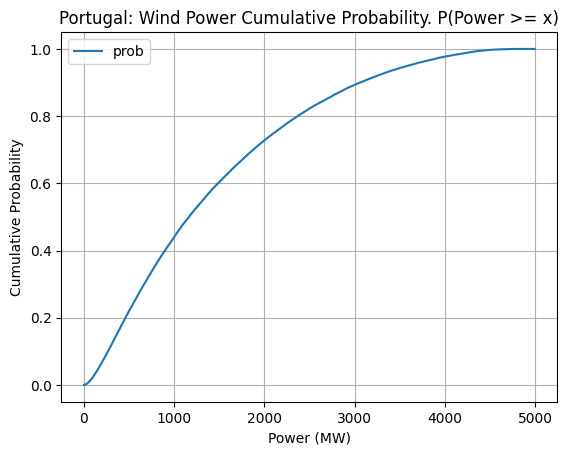

In [6]:
import matplotlib.pyplot as plt

# Create cumulative probability plot
generation_pt_2 = generation_pt.copy()
generation_pt_2['B19'].sort_values().reset_index(drop=True).reset_index().assign(
    prob=lambda x: (x.index + 1)/len(x)
).plot(x='B19', y='prob')

plt.grid(True)
plt.xlabel('Power (MW)')
plt.ylabel('Cumulative Probability')
plt.title('Portugal: Wind Power Cumulative Probability. P(Power >= x)')
plt.show()

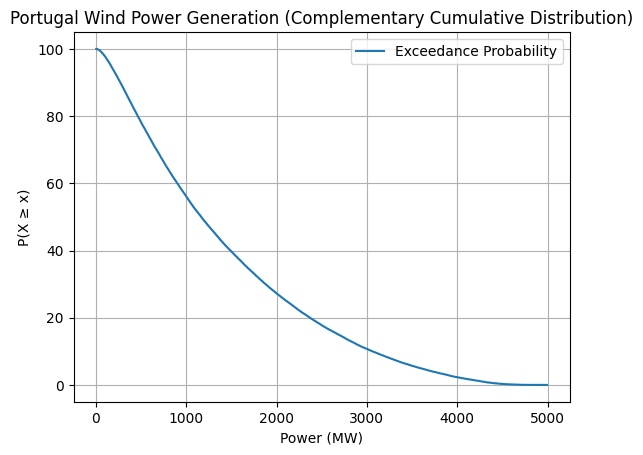

In [24]:
import pandas as pd

generation_pt = pd.read_pickle("../.data_cache/generation_pt.pkl.gz")

generation_pt_2['B19'] = generation_pt_2['B19'].interpolate()
generation_pt_2['B19'].sort_values().reset_index(drop=True).reset_index().assign(
    prob=lambda x: (1 - x.index/len(x))*100
).plot(x='B19', y='prob', label='Exceedance Probability')

plt.grid(True)
plt.xlabel('Power (MW)') 
plt.ylabel('P(X ≥ x)')
plt.title('Portugal Wind Power Generation (Complementary Cumulative Distribution)')
plt.legend()
plt.show()

In [17]:
generation_pt["B19"].max()

np.float64(4995.0)

In [25]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate probabilities 
df = generation_pt_2['B19'].sort_values().reset_index(drop=True).reset_index().assign(
    prob=lambda x: (1 - x.index/len(x))*100
)

# Create plotly figure
fig = px.line(df, x='B19', y='prob')

fig.update_layout(
    title='Portugal Wind Power (Complementary Cumulative Distribution)',
    xaxis_title='Power (MW)',
    yaxis_title='P(X ≥ x)',
)

fig.show()

In [ ]:
import pandas as pd

# Step 1: Load the Excel file without headers
file_path = "Potencias instaladas PT.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path, header=None)

# Step 2: Assign custom column names
df.columns = ['Month', 'Year', 'Eolica', 'Solar', 'Hidrica', 'Bombagem', 'Biomassa']

# Step 3: Inspect the "Month" column
print("Unique values in 'Month' column before cleaning:")
print(df['Month'].unique())

# Step 4: Clean the "Month" column
# - Strip leading/trailing spaces
# - Capitalize the first letter (assuming month names are in Portuguese)
df['Month'] = df['Month'].astype(str).str.strip().str.capitalize()

# Verify cleaning
print("\nUnique values in 'Month' column after cleaning:")
print(df['Month'].unique())

# Step 5: Map month names to numbers
month_map = {
    'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4,
    'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
    'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12
}

df['Month_num'] = df['Month'].map(month_map)

# Step 6: Identify any unmapped months
unmapped_months = df[df['Month_num'].isna()]['Month'].unique()
if len(unmapped_months) > 0:
    print("\nUnmapped months found:", unmapped_months)
    # Optionally, handle these unmapped months
    # For example, you can manually add mappings or correct typos in your data

# Step 7: Drop rows with unmapped months or handle them as desired
df = df.dropna(subset=['Month_num'])  # This drops rows where month mapping failed

# Convert 'Month_num' and 'Year' to integers (if they aren't already)
df['Month_num'] = df['Month_num'].astype(int)
df['Year'] = df['Year'].astype(int)

# Step 8: Create the 'Datetime' column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month_num']].assign(Day=1), format='%Y-%m-%d')

# Step 9: Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Step 10: Drop the original 'Year', 'Month', and 'Month_num' columns if no longer needed
df.drop(columns=['Year', 'Month', 'Month_num'], inplace=True)

# Step 11: Display the transformed DataFrame
print("\nTransformed DataFrame:")
print(df.head())

# Optionally, save the transformed DataFrame to a new Excel file
# df.to_excel("transformed_data.xlsx")

Unique values in 'Month' column before cleaning:
[nan 'Jan' 'Fev' 'mar' 'abr' 'mai' 'jun' 'jul' 'ago' 'set' 'out' 'nov'
 'Dez']

Unique values in 'Month' column after cleaning:
['Nan' 'Jan' 'Fev' 'Mar' 'Abr' 'Mai' 'Jun' 'Jul' 'Ago' 'Set' 'Out' 'Nov'
 'Dez']

Unmapped months found: ['Nan']


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

: 

# Máximo de importações

In [6]:
contribution_pt = contributions["PT"]
contribution_pt_total = contribution_pt.sum(axis=1, skipna=True)
aggregated_total = aggregated.sum(axis=1, skipna=True)

fraction_domestic = contribution_pt_total.div(aggregated_total)

fraction_import = (1-fraction_domestic)

fraction_import.idxmax(), fraction_import.max()


(Timestamp('2024-06-09 07:00:00'), np.float64(0.7131728045325778))

In [10]:
contribution_es = contributions["ES"]
contribution_fr = contributions["FR"]

imports = contribution_es.add(contribution_fr, fill_value=0)
imports_total = imports.sum(axis=1, skipna=True)

imports_total.idxmax(), imports_total.max()

(Timestamp('2022-02-20 14:00:00'), np.float64(4787.0))

In [7]:
type(contribution_pt.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
contribution_pt.loc[Timestamp('2024-06-09 07:00:00')]

In [8]:
# To get a specific timestamp but retain it in the context of the DataFrame
contribution_pt.loc[['2024-06-09 07:00:00']]


,B01,B04,B05,B10,B11,B12,B16,B19,B20,B18
start_time,,,,,,,,,,
2024-06-09 07:00:00,369.0,114.0,0.0,14.0,430.0,4.0,422.0,219.0,31.0,17.0
